<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1">Imports</a></span></li><li><span><a href="#Data-load" data-toc-modified-id="Data-load-2">Data load</a></span></li><li><span><a href="#Работа-с-локациями" data-toc-modified-id="Работа-с-локациями-3">Работа с локациями</a></span></li><li><span><a href="#Работа-со-временем" data-toc-modified-id="Работа-со-временем-4">Работа со временем</a></span></li><li><span><a href="#Количество-уникальных-пользователей" data-toc-modified-id="Количество-уникальных-пользователей-5">Количество уникальных пользователей</a></span></li><li><span><a href="#Deanonimizing-data" data-toc-modified-id="Deanonimizing-data-6">Deanonimizing data</a></span></li><li><span><a href="#количество-водителей,-которые-есть--в-дата-и-тесте,-но-их-нет-в-инфе-по-драйверам" data-toc-modified-id="количество-водителей,-которые-есть--в-дата-и-тесте,-но-их-нет-в-инфе-по-драйверам-7">количество водителей, которые есть  в дата и тесте, но их нет в инфе по драйверам</a></span><ul class="toc-item"><li><span><a href="#Выводы-:-про-всех-драйверов-есть-впринципе-иноформация,-но-в-тесте-есть-28-драйверов,которых-нет-в-трейне." data-toc-modified-id="Выводы-:-про-всех-драйверов-есть-впринципе-иноформация,-но-в-тесте-есть-28-драйверов,которых-нет-в-трейне.-7.1">Выводы : про всех драйверов есть впринципе иноформация, но в тесте есть 28 драйверов,которых нет в трейне.</a></span></li></ul></li><li><span><a href="#Обзор-аномалий" data-toc-modified-id="Обзор-аномалий-8">Обзор аномалий</a></span></li><li><span><a href="#среднее-снедреквадратичн-отклонение" data-toc-modified-id="среднее-снедреквадратичн-отклонение-9">среднее снедреквадратичн отклонение</a></span></li><li><span><a href="#Временные-фичи" data-toc-modified-id="Временные-фичи-10">Временные фичи</a></span><ul class="toc-item"><li><span><a href="#расстояния-во-времени-между-определенными-промежутками-времени" data-toc-modified-id="расстояния-во-времени-между-определенными-промежутками-времени-10.1">расстояния во времени между определенными промежутками времени</a></span></li><li><span><a href="#дропнем-использованные-столбцы" data-toc-modified-id="дропнем-использованные-столбцы-10.2">дропнем использованные столбцы</a></span></li></ul></li><li><span><a href="#hh" data-toc-modified-id="hh-11">hh</a></span></li></ul></div>

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import display,HTML
import pandas_profiling
import numpy as np
import missingno as msno
# from dython.nominal import associations
from scipy.stats import norm, boxcox,skew
from geopy import distance
%matplotlib inline

In [3]:
#model imports
import lightgbm

In [4]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 4)
pd.set_option('display.max_rows', 300)
sns.set(rc={'figure.figsize':(10,6)})

# Data load

In [5]:
data = pd.read_csv("../Sendy_Logistics_Challenge/data_sendy/Train.csv")
riders = pd.read_csv("../Sendy_Logistics_Challenge/data_sendy/Riders.csv")
test_zindi = pd.read_csv("../Sendy_Logistics_Challenge/data_sendy/Test.csv")
submission = pd.read_csv("../Sendy_Logistics_Challenge/data_sendy/SampleSubmission.csv")
vardef = pd.read_csv('../Sendy_Logistics_Challenge/data_sendy/VariableDefinitions.csv')

In [6]:
data.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [7]:
def plus(x):
    return str(x[0])+ ' ' + str(x[1])

In [8]:
data['lat_lon_pickup'] = (data[['Pickup Lat','Pickup Long']]).apply(lambda x: plus(x),axis=1)
data['lat_lon_arrival'] = (data[['Destination Lat','Destination Long']]).apply(lambda x: plus(x),axis=1) 

# str(data['Destination Lat'].values) + str(data['Destination Long'].values)

In [11]:
set_pickups = set(data['lat_lon_pickup'].values)

In [12]:
set_arrivals = set(data['lat_lon_arrival'].values)

In [13]:

same = []
for i in set_pickups:
    if i in set_arrivals:
        same.append(i)

In [14]:
# data[(data.lat_lon_pickup == '-1.2833620000000001 36.8260149') | (data.lat_lon_arrival == '-1.2833620000000001 36.8260149')]

In [17]:
data[data['Rider Id'] == 'Rider_Id_726'].sort_values(['Placement - Day of Month','Placement - Weekday (Mo = 1)'])

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,lat_lon_pickup,lat_lon_arrival
9917,Order_No_2152,User_Id_3367,Bike,3,Personal,1,1,11:54:15 AM,1,1,11:54:34 AM,1,1,12:20:29 PM,1,1,12:23:42 PM,1,1,1:05:59 PM,18,24.0,NaN,-1.198354,36.804424,-1.304365,36.781613,Rider_Id_726,2537,-1.1983542 36.804424499999996,-1.3043649 36.7816132
17702,Order_No_15942,User_Id_2601,Bike,1,Personal,1,1,8:14:31 AM,1,1,8:15:25 AM,1,1,8:43:53 AM,1,1,8:51:03 AM,1,1,8:58:13 AM,3,18.6,NaN,-1.300334,36.797496,-1.296310,36.768822,Rider_Id_726,430,-1.300334 36.797495700000006,-1.2963097 36.7688221
326,Order_No_11324,User_Id_1293,Bike,1,Personal,1,3,1:19:29 PM,1,3,1:19:38 PM,1,3,1:26:15 PM,1,3,1:32:18 PM,1,3,2:10:24 PM,18,24.1,NaN,-1.315234,36.711640,-1.254316,36.831861,Rider_Id_726,2286,-1.3152336000000002 36.711640100000004,-1.2543163999999998 36.831860999999996
8973,Order_No_6946,User_Id_3383,Bike,1,Personal,1,3,9:28:47 AM,1,3,9:29:04 AM,1,3,9:32:52 AM,1,3,9:40:58 AM,1,3,9:47:56 AM,2,NaN,NaN,-1.258674,36.801644,-1.263253,36.799343,Rider_Id_726,418,-1.2586742 36.801643799999994,-1.2632534 36.799342700000004
10072,Order_No_24874,User_Id_2813,Bike,3,Personal,1,3,10:40:25 AM,1,3,10:42:11 AM,1,3,10:48:19 AM,1,3,11:48:52 AM,1,3,11:56:58 AM,5,19.8,NaN,-1.277607,36.822760,-1.276238,36.792952,Rider_Id_726,486,-1.2776072 36.8227604,-1.2762383999999998 36.7929522
820,Order_No_10449,User_Id_2718,Bike,3,Business,1,4,3:49:58 PM,1,4,3:52:01 PM,1,4,4:26:28 PM,1,4,4:32:53 PM,1,4,4:33:03 PM,2,NaN,NaN,-1.266881,36.801724,-1.265746,36.808742,Rider_Id_726,10,-1.2668815 36.8017244,-1.2657456 36.8087424
10284,Order_No_24260,User_Id_1205,Bike,3,Business,1,4,10:40:12 AM,1,4,10:40:21 AM,1,4,10:44:04 AM,1,4,10:47:43 AM,1,4,11:24:41 AM,8,NaN,NaN,-1.257309,36.806008,-1.283965,36.789170,Rider_Id_726,2218,-1.257309 36.806008399999996,-1.2839651 36.789170399999996
12981,Order_No_221,User_Id_2200,Bike,3,Business,1,4,12:24:16 PM,1,4,12:33:19 PM,1,4,12:43:17 PM,1,4,12:51:26 PM,1,4,1:17:26 PM,6,NaN,NaN,-1.258414,36.804800,-1.290894,36.822971,Rider_Id_726,1560,-1.2584143 36.8048002,-1.290894 36.822971
17968,Order_No_13410,User_Id_830,Bike,3,Business,1,4,12:45:09 PM,1,4,1:54:41 PM,1,4,1:59:40 PM,1,4,2:24:50 PM,1,4,2:24:53 PM,8,NaN,NaN,-1.255189,36.782203,-1.290402,36.822630,Rider_Id_726,3,-1.2551895 36.7822034,-1.2904016 36.82263029999999
8979,Order_No_6209,User_Id_1758,Bike,2,Personal,1,6,8:23:08 AM,1,6,8:26:43 AM,1,6,8:33:14 AM,1,6,8:41:14 AM,1,6,8:58:55 AM,7,15.1,NaN,-1.280753,36.819117,-1.289672,36.771241,Rider_Id_726,1061,-1.280753 36.8191175,-1.2896722 36.771240899999995


In [9]:
data['speed'] = data['Distance (KM)'] / (data['Time from Pickup to Arrival'] / 3600) 
data['is_anomaly'] = np.where(data['speed'] >=55,1,0)

In [31]:
from scipy.stats import norm

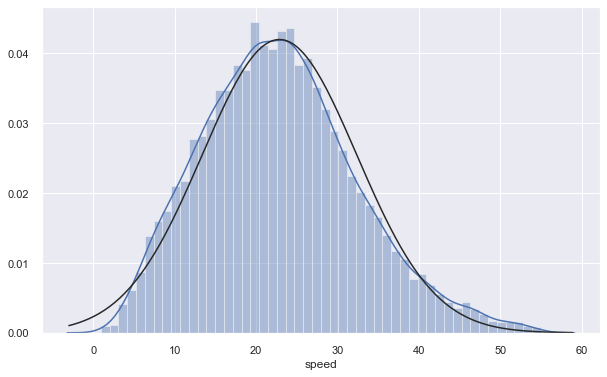

In [32]:
norm_speed = data[data.speed <= 55]
sns.distplot(norm_speed.speed, fit = norm)

In [10]:
def add_time_feature(data):
    # через сколько гонщик подтвердил, что он приедет за заказом
    data['t_from_pl_to_conf_1_2'] = (pd.to_datetime(data["Confirmation - Time"]) - pd.to_datetime(data["Placement - Time"])).astype('timedelta64[s]')
    # через сколько времени после подтверждения гонщик приехал, чтобы забрать заказ
    data['t_from_conf_to_arrival_2_3'] = (pd.to_datetime(data["Arrival at Pickup - Time"]) - pd.to_datetime(data["Confirmation - Time"])).astype('timedelta64[s]')
    # промежуток времени между  тем когда гонщик приехал забрать и заказ, и чеез сколько он его реально забрал
    data['t_from_arrival_to_pickup_3_4'] = (pd.to_datetime(data["Pickup - Time"]) - pd.to_datetime(data["Arrival at Pickup - Time"])).astype('timedelta64[s]')
    
    #Суммы по промежуткам времени
    
    # сколько времени прошло между размещением заказа и временем его приезда за заказом
    data['time_interval_1_3'] = data['t_from_pl_to_conf_1_2'] + data['t_from_conf_to_arrival_2_3']
    
    # сколько времени прошло между подтверждением заказа и временем,когда он забрал заказ
    data['time_interval_2_4'] = data['t_from_conf_to_arrival_2_3'] + data['t_from_arrival_to_pickup_3_4']
    
    # сколько времени прошло между размещением заказа и временем,когда он забрал заказ
    data['time_interval_1_4'] = data['t_from_pl_to_conf_1_2']+data['t_from_conf_to_arrival_2_3']+data['t_from_arrival_to_pickup_3_4']
    
    
    
    data["Pickup - hour"] = pd.to_datetime(data["Pickup - Time"]).dt.hour.astype("category")
    # является ли выходным
    data['is_holiday'] = np.where(data['Pickup - Weekday (Mo = 1)'] >=6,1,0)

In [11]:
add_time_feature(data)

# Работа с локациями

In [52]:
data.groupby('lat_lon_arrival').mean().sort_values('is_anomaly',ascending = False).head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,speed,is_anomaly,t_from_pl_to_conf_1_2,t_from_conf_to_arrival_2_3,t_from_arrival_to_pickup_3_4,time_interval_1_3,time_interval_2_4,time_interval_1_4,is_holiday
lat_lon_arrival,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1.2423902 36.8554947,3.0,20.0,6.0,20.0,6.0,20.0,6.0,20.0,6.0,20.0,6.0,12.0,NaN,NaN,-1.283658,36.788601,-1.242390,36.855495,4.0,10800.000000,1.0,18.0,844.0,1981.0,862.0,2825.0,2843.0,1.0
-1.3033063 36.811792100000005,3.0,12.0,2.0,12.0,2.0,12.0,2.0,12.0,2.0,12.0,2.0,4.0,24.6,NaN,-1.288780,36.816831,-1.303306,36.811792,2.0,7200.000000,1.0,185.0,559.0,146.0,744.0,705.0,890.0,0.0
-1.2963555 36.8084065,3.0,17.0,4.0,17.0,4.0,17.0,4.0,17.0,4.0,17.0,4.0,6.0,NaN,NaN,-1.272639,36.794723,-1.296355,36.808406,10.0,2160.000000,1.0,48.0,1141.0,910.0,1189.0,2051.0,2099.0,0.0
-1.2738933000000001 36.8016678,3.0,20.0,1.0,20.0,1.0,20.0,1.0,20.0,1.0,20.0,1.0,5.0,NaN,NaN,-1.255189,36.782203,-1.273893,36.801668,4.0,4500.000000,1.0,13.0,310.0,1280.0,323.0,1590.0,1603.0,0.0
-1.2950632 36.8196747,3.0,20.0,3.0,20.0,3.0,20.0,3.0,20.0,3.0,20.0,3.0,2.0,28.2,NaN,-1.279395,36.825364,-1.295063,36.819675,104.0,69.230769,1.0,83.0,402.0,309.0,485.0,711.0,794.0,0.0


In [55]:
data.head(1)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,lat_lon_pickup,lat_lon_arrival,speed,is_anomaly,t_from_pl_to_conf_1_2,t_from_conf_to_arrival_2_3,t_from_arrival_to_pickup_3_4,time_interval_1_3,time_interval_2_4,time_interval_1_4,Pickup - hour,is_holiday
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.83037,-1.300406,36.829741,Rider_Id_432,745,-1.3177546999999998 36.8303703,-1.3004062 36.829741,19.328859,0,264.0,1477.0,1363.0,1741.0,2840.0,3104.0,10,0


In [78]:
>>> table = pd.pivot_table(data, values='speed',index=['Rider Id','lat_lon_arrival'],columns=['is_anomaly'], aggfunc='count').\
sort_values(1,ascending=False).head(300)
>>> table

is_anomaly                                              0  \
Rider Id     lat_lon_arrival                                
Rider_Id_515 -1.3004062 36.829741                     3.0   
Rider_Id_239 -1.3004062 36.829741                     3.0   
Rider_Id_619 -1.3004062 36.829741                     2.0   
             -1.2638185 36.7930057                    1.0   
Rider_Id_10  -1.3004062 36.829741                     1.0   
Rider_Id_39  -1.3004062 36.829741                     4.0   
Rider_Id_515 -1.2638185 36.7930057                    NaN   
Rider_Id_39  -1.2991441000000001 36.7528804           NaN   
Rider_Id_239 -1.306378 36.7519845                     3.0   
Rider_Id_403 -1.2638185 36.7930057                    NaN   
Rider_Id_436 -1.3004062 36.829741                     8.0   
Rider_Id_10  -1.2638185 36.7930057                    1.0   
Rider_Id_137 -1.3882008 36.7699445                    NaN   
Rider_Id_515 -1.306378 36.7519845                     6.0   
Rider_Id_39  -1.306378 36.7519845                     3.0   
             -1.2638185 36.7930057                    1.0   
Rider_Id_51  -1.2615888000000002 36.7928732           2.0   
Rider_Id_239 -1.2638185 36.7930057                    NaN   
Rider_Id_41  -1.2638185 36.7930057                    1.0   
Rider_Id_515 -1.3228003000000002 36.8306435           NaN   
Rider_Id_10  -1.3077869 36.844320700000004            1.0   
             -1.306378 36.7519845                     6.0   
Rider_Id_472 -1.2770708 36.8231093                    NaN   
Rider_Id_137 -1.2991441000000001 36.7528804           NaN   
Rider_Id_515 -1.2574219 36.7927073                    6.0   
Rider_Id_86  -1.2016076999999998 36.930397            1.0   
Rider_Id_647 -1.2571472 36.795063299999995            2.0   
Rider_Id_239 -1.2991441000000001 36.7528804           1.0   
Rider_Id_472 -1.2638185 36.7930057                    NaN   
Rider_Id_349 -1.3004062 36.829741                    22.0   
Rider_Id_39  -1.3077869 36.844320700000004            1.0   
Rider_Id_619 -1.2991441000000001 36.7528804           NaN   
Rider_Id_10  -1.2991441000000001 36.7528804           NaN   
Rider_Id_137 -1.2638185 36.7930057                    NaN   
Rider_Id_647 -1.2551895 36.7822034                    4.0   
Rider_Id_619 -1.306378 36.7519845                     4.0   
Rider_Id_507 -1.2638185 36.7930057                    2.0   
Rider_Id_291 -1.259919 36.808244                      NaN   
Rider_Id_647 -1.2640571000000003 36.7883547           NaN   
Rider_Id_70  -1.3882008 36.7699445                    NaN   
Rider_Id_411 -1.3004062 36.829741                     3.0   
Rider_Id_647 -1.2584143 36.8048002                    3.0   
Rider_Id_921 -1.2784063 36.8222933                    2.0   
             -1.2770708 36.8231093                    3.0   
Rider_Id_70  -1.2602337 36.79905479999999             NaN   
             -1.2638185 36.7930057                    NaN   
             -1.3004062 36.829741                     NaN   
Rider_Id_919 -1.2628473 36.781805                     NaN   
Rider_Id_515 -1.2991441000000001 36.7528804           NaN   
Rider_Id_619 -1.3228003000000002 36.8306435           NaN   
Rider_Id_848 -1.3077869 36.844320700000004            NaN   
Rider_Id_874 -1.300921 36.828195                      NaN   
Rider_Id_619 -1.3077869 36.844320700000004            NaN   
Rider_Id_406 -1.228911 36.881876                      NaN   
Rider_Id_459 -1.3270347 36.866736200000005            NaN   
Rider_Id_472 -1.3004062 36.829741                     NaN   
Rider_Id_61  -1.2551895 36.7822034                    2.0   
Rider_Id_76  -1.2600926000000001 36.8088685           NaN   
Rider_Id_10  -1.3228003000000002 36.8306435           NaN   
Rider_Id_656 -1.2551895 36.7822034                    NaN   
Rider_Id_555 -1.3004062 36.829741                     1.0   
Rider_Id_39  -1.3167113000000001 36.8301563           NaN   
Rider_Id_660 -1.290894 36.822971                      1.0   
Rider_Id_436 -1.290894 36.822971   

In [95]:
data[(data.lat_lon_arrival == '-1.3004062 36.829741') & (data['Rider Id'] == 'Rider_Id_10') & (data['User Id'] == 'User_Id_393' )].sort_values('User Id',ascending = False).head(300)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,lat_lon_pickup,lat_lon_arrival,speed,is_anomaly,t_from_pl_to_conf_1_2,t_from_conf_to_arrival_2_3,t_from_arrival_to_pickup_3_4,time_interval_1_3,time_interval_2_4,time_interval_1_4,Pickup - hour,is_holiday
1931,Order_No_1860,User_Id_393,Bike,3,Business,13,4,4:00:44 PM,13,4,4:00:56 PM,13,4,4:01:27 PM,13,4,4:37:46 PM,13,4,4:46:38 PM,4,22.3,NaN,-1.322800,36.830644,-1.300406,36.829741,Rider_Id_10,532,-1.3228003000000002 36.8306435,-1.3004062 36.829741,27.067669,0,12.0,31.0,2179.0,43.0,2210.0,2222.0,16,0
5762,Order_No_22640,User_Id_393,Bike,3,Business,10,5,2:42:57 PM,10,5,2:44:28 PM,10,5,2:44:33 PM,10,5,3:12:53 PM,10,5,3:12:55 PM,4,NaN,NaN,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_10,2,-1.3167113000000001 36.8301563,-1.3004062 36.829741,7200.000000,1,91.0,5.0,1700.0,96.0,1705.0,1796.0,15,0
12420,Order_No_3057,User_Id_393,Bike,3,Business,28,4,12:36:24 PM,28,4,12:36:37 PM,28,4,12:37:05 PM,28,4,1:22:51 PM,28,4,1:22:53 PM,4,23.6,NaN,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_10,2,-1.3167113000000001 36.8301563,-1.3004062 36.829741,7200.000000,1,13.0,28.0,2746.0,41.0,2774.0,2787.0,13,0
12967,Order_No_378,User_Id_393,Bike,3,Business,26,2,12:47:59 PM,26,2,12:48:24 PM,26,2,12:48:28 PM,26,2,1:10:23 PM,26,2,1:10:27 PM,4,26.3,NaN,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_10,4,-1.3167113000000001 36.8301563,-1.3004062 36.829741,3600.000000,1,25.0,4.0,1315.0,29.0,1319.0,1344.0,13,0
17510,Order_No_12087,User_Id_393,Bike,3,Business,2,6,12:18:41 PM,2,6,12:18:50 PM,2,6,12:18:58 PM,2,6,12:44:11 PM,2,6,12:44:13 PM,4,27.7,NaN,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_10,2,-1.3167113000000001 36.8301563,-1.3004062 36.829741,7200.000000,1,9.0,8.0,1513.0,17.0,1521.0,1530.0,12,1


In [50]:
data[data.lat_lon_pickup == '-1.2581837 36.801705600000005']

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,lat_lon_pickup,lat_lon_arrival,speed,is_anomaly,t_from_pl_to_conf_1_2,t_from_conf_to_arrival_2_3,t_from_arrival_to_pickup_3_4,time_interval_1_3,time_interval_2_4,time_interval_1_4,Pickup - hour,is_holiday
5746,Order_No_25904,User_Id_3557,Bike,3,Business,30,2,3:23:44 PM,30,2,3:24:02 PM,30,2,3:34:31 PM,30,2,3:44:17 PM,30,2,3:44:19 PM,4,27.3,NaN,-1.258184,36.801706,-1.262215,36.808739,Rider_Id_380,2,-1.2581837 36.801705600000005,-1.2622145 36.8087391,7200.000000,1,18.0,629.0,586.0,647.0,1215.0,1233.0,15,0
17578,Order_No_26826,User_Id_1287,Bike,3,Business,7,2,3:04:58 PM,7,2,3:05:33 PM,7,2,3:07:03 PM,7,2,3:13:38 PM,7,2,3:21:49 PM,3,NaN,NaN,-1.258184,36.801706,-1.255189,36.782203,Rider_Id_520,491,-1.2581837 36.801705600000005,-1.2551895 36.7822034,21.995927,0,35.0,90.0,395.0,125.0,485.0,520.0,15,0


In [47]:
data.groupby('is_anomaly').count().sort_values('lat_lon_pickup',ascending = False).head(300)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,lat_lon_pickup,lat_lon_arrival,speed,t_from_pl_to_conf_1_2,t_from_conf_to_arrival_2_3,t_from_arrival_to_pickup_3_4,time_interval_1_3,time_interval_2_4,time_interval_1_4,Pickup - hour,is_holiday
is_anomaly,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,15971,533,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049,20049
1,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,864,19,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152


# Работа со временем

In [27]:
data_time = data[['Time from Pickup to Arrival','is_anomaly','Distance (KM)', 't_from_pl_to_conf_1_2', 't_from_conf_to_arrival_2_3', 't_from_arrival_to_pickup_3_4', 'time_interval_1_3', 'time_interval_2_4','time_interval_1_4',]]

In [28]:
data_time.sort_values('is_anomaly',ascending = False).head(300)

,Time from Pickup to Arrival,is_anomaly,Distance (KM),t_from_pl_to_conf_1_2,t_from_conf_to_arrival_2_3,t_from_arrival_to_pickup_3_4,time_interval_1_3,time_interval_2_4,time_interval_1_4
10928,2244,1,35,7.0,87.0,454.0,94.0,541.0,548.0
18861,103,1,6,82.0,831.0,1150.0,913.0,1981.0,2063.0
13125,410,1,7,28.0,257.0,573.0,285.0,830.0,858.0
18709,3,1,11,10.0,9.0,3639.0,19.0,3648.0,3658.0
8593,1215,1,17,478.0,699.0,922.0,1177.0,1621.0,2099.0
8596,2,1,1,22.0,517.0,2092.0,539.0,2609.0,2631.0
13116,121,1,8,42.0,7.0,1256.0,49.0,1263.0,1305.0
8605,2,1,1,10.0,380.0,905.0,390.0,1285.0,1295.0
18727,252,1,4,21.0,75.0,1209.0,96.0,1284.0,1305.0
18729,18,1,6,62.0,859.0,1569.0,921.0,2428.0,2490.0


In [29]:
data_time.sort_values('is_anomaly',ascending = False).tail(300)

,Time from Pickup to Arrival,is_anomaly,Distance (KM),t_from_pl_to_conf_1_2,t_from_conf_to_arrival_2_3,t_from_arrival_to_pickup_3_4,time_interval_1_3,time_interval_2_4,time_interval_1_4
7404,4747,0,27,19.0,1783.0,427.0,1802.0,2210.0,2229.0
7405,1358,0,6,602.0,461.0,693.0,1063.0,1154.0,1756.0
7415,1111,0,4,613.0,45.0,1017.0,658.0,1062.0,1675.0
7422,2733,0,23,28.0,883.0,461.0,911.0,1344.0,1372.0
7421,2091,0,17,20.0,133.0,298.0,153.0,431.0,451.0
7420,3099,0,19,29.0,307.0,2426.0,336.0,2733.0,2762.0
7419,849,0,5,4.0,175.0,1058.0,179.0,1233.0,1237.0
7418,2731,0,16,134.0,67.0,1112.0,201.0,1179.0,1313.0
7417,968,0,6,22.0,27.0,485.0,49.0,512.0,534.0
7416,3331,0,6,91.0,521.0,207.0,612.0,728.0,819.0


In [30]:
data.groupby('Rider Id').count().sort_values('Order No')

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,lat_lon_pickup,lat_lon_arrival,speed,is_anomaly,t_from_pl_to_conf_1_2,t_from_conf_to_arrival_2_3,t_from_arrival_to_pickup_3_4,time_interval_1_3,time_interval_2_4,time_interval_1_4,Pickup - hour,is_holiday
Rider Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rider_Id_0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Rider_Id_220,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Rider_Id_745,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Rider_Id_371,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Rider_Id_214,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rider_Id_205,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,132,1,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182
Rider_Id_101,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,155,3,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
Rider_Id_523,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,175,13,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199


In [31]:
data_time.groupby('is_anomaly').mean()

,Time from Pickup to Arrival,Distance (KM),t_from_pl_to_conf_1_2,t_from_conf_to_arrival_2_3,t_from_arrival_to_pickup_3_4,time_interval_1_3,time_interval_2_4,time_interval_1_4
is_anomaly,,,,,,,,
0,1641.995232,9.577695,438.121311,791.993074,684.916884,1230.114385,1476.909958,1915.031269
1,229.575568,8.396241,356.933438,535.129992,1668.920908,892.063430,2204.050901,2560.984338


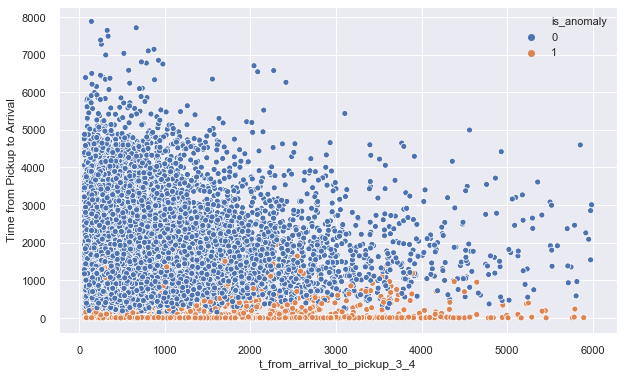

In [32]:
sns.scatterplot(x = 't_from_arrival_to_pickup_3_4', y = 'Time from Pickup to Arrival',data = data_time,hue='is_anomaly')

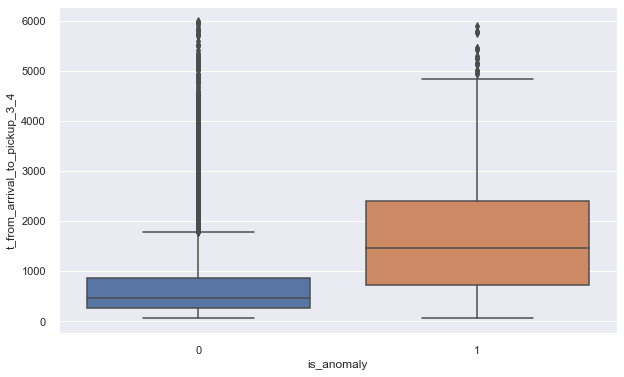

In [33]:
sns.boxplot(x = 'is_anomaly', y =  't_from_arrival_to_pickup_3_4',data = data_time)

In [39]:
data.groupby('Rider Id').mean().sort_values('is_anomaly',ascending = False)

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,speed,is_anomaly,t_from_pl_to_conf_1_2,t_from_conf_to_arrival_2_3,t_from_arrival_to_pickup_3_4,time_interval_1_3,time_interval_2_4,time_interval_1_4,is_holiday
Rider Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rider_Id_947,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,14.000000,28.600000,NaN,-1.347207,36.769264,-1.326310,36.862290,12.000000,4200.000000,1.000000,265.000000,598.000000,3192.000000,863.000000,3790.000000,4055.000000,0.000000
Rider_Id_170,3.000000,18.000000,1.000000,18.000000,1.000000,18.000000,1.000000,18.000000,1.000000,18.000000,1.000000,17.000000,21.300000,NaN,-1.325452,36.721658,-1.323350,36.813916,949.000000,64.488936,1.000000,358.000000,1420.000000,261.000000,1778.000000,1681.000000,2039.000000,0.000000
Rider_Id_214,3.000000,18.000000,4.000000,18.000000,4.000000,18.000000,4.000000,18.000000,4.000000,18.000000,4.000000,1.000000,NaN,NaN,-1.361197,36.653828,-1.362035,36.653337,2.000000,1800.000000,1.000000,11.000000,147.000000,72.000000,158.000000,219.000000,230.000000,0.000000
Rider_Id_794,3.000000,29.000000,4.000000,29.000000,4.000000,29.000000,4.000000,29.000000,4.000000,29.000000,4.000000,15.000000,21.500000,NaN,-1.330300,36.870793,-1.313271,36.912704,355.000000,152.112676,1.000000,1040.000000,2492.000000,2422.000000,3532.000000,4914.000000,5954.000000,0.000000
Rider_Id_137,3.000000,17.884615,3.423077,17.884615,3.423077,17.884615,3.423077,17.884615,3.423077,17.884615,3.423077,11.192308,24.262500,NaN,-1.285027,36.821143,-1.300385,36.801255,588.384615,127.860507,0.846154,83.269231,227.000000,2042.115385,310.269231,2269.115385,2352.384615,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rider_Id_453,2.319149,17.382979,3.617021,17.382979,3.617021,17.382979,3.617021,17.382979,3.617021,17.382979,3.617021,7.957447,22.146154,3.0,-1.249293,36.802259,-1.252237,36.804903,1155.319149,27.287402,0.000000,366.468085,743.127660,463.297872,1109.595745,1206.425532,1572.893617,0.148936
Rider_Id_454,3.000000,8.714286,3.714286,8.714286,3.714286,8.714286,3.714286,8.714286,3.714286,8.714286,3.714286,8.142857,23.166667,10.9,-1.289443,36.809969,-1.292020,36.796237,1379.000000,21.435616,0.000000,1026.142857,717.714286,1091.857143,1743.857143,1809.571429,2835.714286,0.000000
Rider_Id_455,3.000000,20.000000,1.500000,20.000000,1.500000,20.000000,1.500000,20.000000,1.500000,20.000000,1.500000,15.500000,19.300000,NaN,-1.262462,36.853151,-1.290972,36.749681,1955.000000,32.156340,0.000000,36.000000,1187.500000,902.000000,1223.500000,2089.500000,2125.500000,0.000000


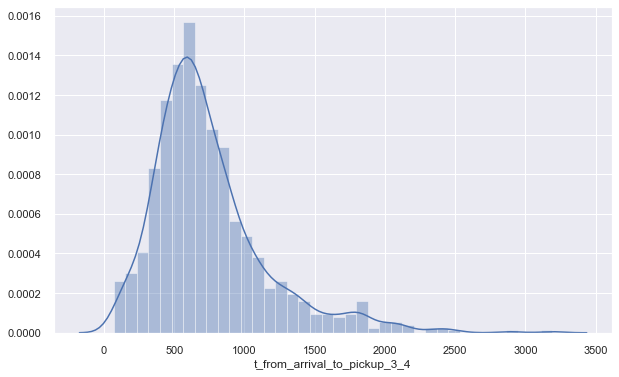

In [38]:
sns.distplot(data.groupby('Rider Id').mean().sort_values('is_anomaly',ascending = False).t_from_arrival_to_pickup_3_4)

# Количество уникальных пользователей

In [5]:
uniq_user_train = set(list(data['User Id'].unique()))
uniq_user_test = list(test_zindi['User Id'].unique())

list_same_user = []
for i in uniq_user_test:
    if i in uniq_user_train:
        list_same_user.append(i)

In [6]:
len(list_same_user)

1021

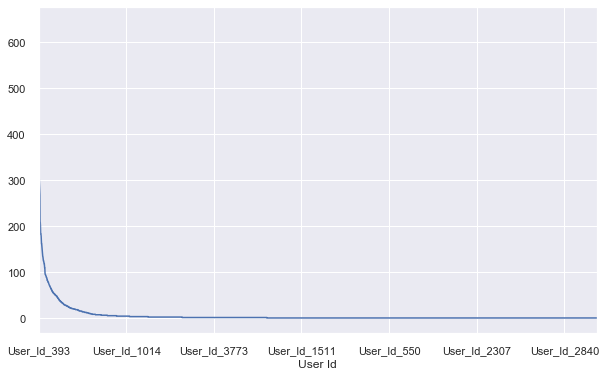

In [7]:
data.groupby('User Id').count().sort_values('Order No',ascending = False)['Order No'].plot()

In [11]:
data.groupby('Rider Id').mean().sort_values('Time from Pickup to Arrival',ascending = False)

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
Rider Id,,,,,,,,,,,,,,,,,,,
Rider_Id_792,3.0,29.0,1.000000,29.0,1.000000,29.0,1.000000,29.0,1.000000,29.0,1.000000,19.0,NaN,NaN,-1.317592,36.874235,-1.238309,36.757310,4616.00
Rider_Id_203,3.0,24.0,5.000000,24.0,5.000000,24.0,5.000000,24.0,5.000000,24.0,5.000000,6.0,20.100000,NaN,-1.273056,36.811298,-1.297432,36.802861,4515.00
Rider_Id_305,3.0,8.0,5.000000,8.0,5.000000,8.0,5.000000,8.0,5.000000,8.0,5.000000,12.0,30.200000,NaN,-1.257147,36.795063,-1.240491,36.884779,4410.00
Rider_Id_730,3.0,15.5,2.500000,15.5,2.500000,15.5,2.500000,15.5,2.500000,15.5,2.500000,22.0,25.200000,NaN,-1.269975,36.874644,-1.267634,36.840320,4135.00
Rider_Id_94,3.0,26.0,2.000000,26.0,2.000000,26.0,2.000000,26.0,2.000000,26.0,2.000000,14.0,31.000000,NaN,-1.310451,36.868724,-1.259542,36.787118,3951.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rider_Id_927,3.0,15.5,2.916667,15.5,2.916667,15.5,2.916667,15.5,2.916667,15.5,2.916667,8.5,20.640000,NaN,-1.305605,36.828443,-1.292566,36.800357,336.25
Rider_Id_723,3.0,19.0,3.000000,19.0,3.000000,19.0,3.000000,19.0,3.000000,19.0,3.000000,3.0,24.200000,NaN,-1.276549,36.766981,-1.294944,36.760421,324.00
Rider_Id_818,3.0,14.0,2.200000,14.0,2.200000,14.0,2.200000,14.0,2.200000,14.0,2.200000,10.4,25.966667,NaN,-1.272690,36.797367,-1.307703,36.790946,180.80


In [12]:
set(data.columns) ^ set(test_zindi.columns)

{'Arrival at Destination - Day of Month',
 'Arrival at Destination - Time',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Time from Pickup to Arrival'}

In [17]:
riders.sort_values('Average_Rating',ascending = False).head(300)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,avg_rate_given_Nrate
454,Rider_Id_497,2056,206,15.2,197,0.077157
832,Rider_Id_784,2311,2824,15.2,16,0.950000
820,Rider_Id_816,2466,3114,15.1,142,0.106338
827,Rider_Id_841,2204,2871,15.1,31,0.487097
828,Rider_Id_135,2447,2786,15.1,198,0.076263
889,Rider_Id_9,2265,3101,15.1,31,0.487097
898,Rider_Id_689,130,167,15.0,9,1.666667
797,Rider_Id_495,62,297,15.0,6,2.500000
389,Rider_Id_592,70,714,15.0,16,0.937500
902,Rider_Id_183,213,167,15.0,27,0.555556


In [16]:
riders['avg_rate_given_Nrate'] = riders.Average_Rating / riders.No_of_Ratings

# Deanonimizing data

In [22]:
test_zindi.sort_values('Placement - Day of Month').head(5)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
3313,Order_No_7245,User_Id_393,Bike,3,Business,1,4,10:17:38 AM,1,4,10:17:53 AM,1,4,10:18:04 AM,1,4,10:37:33 AM,10,NaN,NaN,-1.317755,36.830370,-1.257422,36.792707,Rider_Id_731
6195,Order_No_15718,User_Id_3613,Bike,3,Business,1,5,10:22:58 AM,1,5,10:26:26 AM,1,5,10:35:09 AM,1,5,10:36:13 AM,7,26.6,NaN,-1.264703,36.797826,-1.273362,36.770404,Rider_Id_825
1259,Order_No_15868,User_Id_1482,Bike,3,Business,1,1,2:10:46 PM,1,1,2:11:37 PM,1,1,2:23:39 PM,1,1,2:24:53 PM,7,NaN,NaN,-1.282277,36.795312,-1.264960,36.798178,Rider_Id_138
3388,Order_No_27110,User_Id_2200,Bike,3,Business,1,4,3:11:56 PM,1,4,3:24:32 PM,1,4,3:39:44 PM,1,4,3:44:03 PM,6,NaN,NaN,-1.258414,36.804800,-1.290894,36.822971,Rider_Id_928
3047,Order_No_1391,User_Id_1584,Bike,3,Business,1,4,9:23:01 AM,1,4,9:24:33 AM,1,4,9:32:04 AM,1,4,10:23:45 AM,13,NaN,NaN,-1.271785,36.810536,-1.332311,36.869262,Rider_Id_85


In [44]:
for i in range(1,32):
    pr = sorted(test_zindi[test_zindi['Placement - Day of Month'] == i]['Placement - Weekday (Mo = 1)'].unique())
    print(i, '->',pr)

1 -> [1, 2, 3, 4, 5, 6, 7]
2 -> [1, 2, 3, 4, 5, 6, 7]
3 -> [1, 2, 3, 4, 5, 6, 7]
4 -> [1, 2, 3, 4, 5, 6]
5 -> [1, 2, 3, 4, 5, 6, 7]
6 -> [1, 2, 3, 4, 5, 6, 7]
7 -> [1, 2, 3, 4, 5, 6, 7]
8 -> [1, 2, 3, 4, 5, 6, 7]
9 -> [1, 2, 3, 4, 5, 6, 7]
10 -> [1, 2, 3, 4, 5, 6, 7]
11 -> [1, 2, 3, 4, 5, 6, 7]
12 -> [1, 2, 3, 4, 5, 6, 7]
13 -> [1, 2, 3, 4, 5, 6, 7]
14 -> [1, 2, 3, 4, 5, 6, 7]
15 -> [1, 2, 3, 4, 5, 6]
16 -> [1, 2, 3, 4, 5, 6, 7]
17 -> [1, 2, 3, 4, 5, 6, 7]
18 -> [1, 2, 3, 4, 5, 6, 7]
19 -> [1, 2, 3, 4, 5, 6, 7]
20 -> [1, 2, 3, 4, 5, 6, 7]
21 -> [1, 2, 3, 4, 5, 6, 7]
22 -> [1, 2, 3, 4, 5, 6, 7]
23 -> [1, 2, 3, 4, 5, 6, 7]
24 -> [1, 2, 3, 4, 5, 6, 7]
25 -> [1, 2, 3, 4, 5, 6]
26 -> [1, 2, 3, 4, 5, 6, 7]
27 -> [1, 2, 3, 4, 5, 6, 7]
28 -> [1, 2, 3, 4, 5, 6, 7]
29 -> [1, 2, 3, 4, 5, 6, 7]
30 -> [1, 2, 3, 4, 5, 6, 7]
31 -> [1, 2, 3, 4, 5]


In [45]:
for i in range(1,32):
    pr = sorted(data[data['Placement - Day of Month'] == i]['Placement - Weekday (Mo = 1)'].unique())
    print(i, '->',pr)

1 -> [1, 2, 3, 4, 5, 6, 7]
2 -> [1, 2, 3, 4, 5, 6, 7]
3 -> [1, 2, 3, 4, 5, 6, 7]
4 -> [1, 2, 3, 4, 5, 6, 7]
5 -> [1, 2, 3, 4, 5, 6, 7]
6 -> [1, 2, 3, 4, 5, 6, 7]
7 -> [1, 2, 3, 4, 5, 6, 7]
8 -> [1, 2, 3, 4, 5, 6, 7]
9 -> [1, 2, 3, 4, 5, 6, 7]
10 -> [1, 2, 3, 4, 5, 6, 7]
11 -> [1, 2, 3, 4, 5, 6, 7]
12 -> [1, 2, 3, 4, 5, 6, 7]
13 -> [1, 2, 3, 4, 5, 6, 7]
14 -> [1, 2, 3, 4, 5, 6, 7]
15 -> [1, 2, 3, 4, 5, 6, 7]
16 -> [1, 2, 3, 4, 5, 6, 7]
17 -> [1, 2, 3, 4, 5, 6, 7]
18 -> [1, 2, 3, 4, 5, 6, 7]
19 -> [1, 2, 3, 4, 5, 6, 7]
20 -> [1, 2, 3, 4, 5, 6, 7]
21 -> [1, 2, 3, 4, 5, 6, 7]
22 -> [1, 2, 3, 4, 5, 6, 7]
23 -> [1, 2, 3, 4, 5, 6, 7]
24 -> [1, 2, 3, 4, 5, 6, 7]
25 -> [1, 2, 3, 4, 5, 6, 7]
26 -> [1, 2, 3, 4, 5, 6, 7]
27 -> [1, 2, 3, 4, 5, 6, 7]
28 -> [1, 2, 3, 4, 5, 6, 7]
29 -> [1, 2, 3, 4, 5, 6, 7]
30 -> [1, 2, 3, 4, 5, 6, 7]
31 -> [1, 2, 3, 4, 5, 7]


In [27]:
data[data['Placement - Day of Month'] == 1]['Placement - Weekday (Mo = 1)'].unique()

array([3, 2, 1, 5, 6, 4, 7], dtype=int64)

In [21]:
data.sort_values('Placement - Day of Month').head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
445,Order_No_1686,User_Id_3491,Bike,3,Business,1,3,3:46:10 PM,1,3,3:46:24 PM,1,3,3:50:44 PM,1,3,3:52:20 PM,1,3,3:52:32 PM,3,NaN,NaN,-1.223212,36.893255,-1.228340,36.882276,Rider_Id_521,12
19545,Order_No_12645,User_Id_393,Bike,3,Business,1,5,9:40:23 AM,1,5,10:17:41 AM,1,5,10:25:54 AM,1,5,10:36:30 AM,1,5,10:50:56 AM,4,26.6,NaN,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_436,866


# количество водителей, которые есть  в дата и тесте, но их нет в инфе по драйверам

In [56]:
set_riders_from_data = set(data['Rider Id'].unique())
set_riders_from_riders = set(riders['Rider Id'].unique())
set_riders_from_test  = set(test_zindi['Rider Id'].unique())

print('Количество уникальных райдеров в data ->',len(set_riders_from_data))
print('Количество уникальных райдеров в riders ->',len(set_riders_from_riders))
print('Количество уникальных райдеров в test ->',len(set_riders_from_test))

Количество уникальных райдеров в data -> 924
Количество уникальных райдеров в riders -> 960
Количество уникальных райдеров в test -> 822


In [69]:
# Найдем тех драйверов, которые есть в test, но их нет в data

In [70]:
uniq_riders_in_test = []
new_riders_in_test = []
for i in set_riders_from_test:
    if i in set_riders_from_data:
        uniq_riders_in_test.append(i)
    else:
        new_riders_in_test.append(i)

In [77]:
print( 'Есть трейне в есть в тесте: ',len(uniq_riders_in_test))
print( 'Есть трейне, но их нет в тесте тесте: ',len(new_riders_in_test))

Есть трейне в есть в тесте:  794
Есть трейне, но их нет в тесте тесте:  28


## Выводы : про всех драйверов есть впринципе иноформация, но в тесте есть 28 драйверов,которых нет в трейне.

In [ ]:
train_order_number = riders["id_rider"] = riders["Rider Id"].apply(lambda o:int(o.replace("Rider_Id_",""))).astype("int")

In [109]:
riders.sort_values('id_rider')

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,id_rider
720,Rider_Id_0,3048,2570,14.0,512,0
497,Rider_Id_1,8,589,0.0,1,1
909,Rider_Id_2,455,152,13.6,51,2
881,Rider_Id_3,32,194,9.0,3,3
192,Rider_Id_4,4505,1377,13.9,1182,4
...,...,...,...,...,...,...
753,Rider_Id_955,2595,1943,13.8,746,955
197,Rider_Id_956,4847,901,14.1,902,956
674,Rider_Id_957,11,419,0.0,1,957
571,Rider_Id_958,1907,530,13.8,305,958


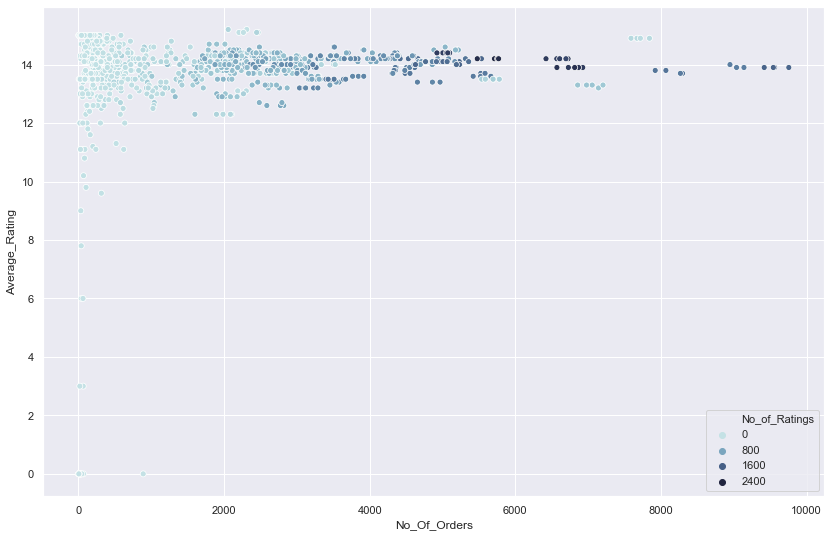

In [144]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="No_Of_Orders", y="Average_Rating",
                     hue="No_of_Ratings",
#                      size="Average_Rating",
                     palette=cmap, sizes=(10, 200),
                     data=riders)
#hue="Age",Average_Rating

In [165]:
data.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,id_rider
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,...,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549,432
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,18,5,4:07:16 PM,...,20,24.5,NaN,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549,432


In [169]:
def compute_distance(row):
    src = (row["Pickup Lat"],row["Pickup Long"])
    dest= (row["Destination Lat"],row["Destination Long"])
    return distance.distance(src,dest).km
data["geopy_distance"] = data.apply(compute_distance,axis=1)
data['avarege_speed'] = data['Distance (KM)'] / (data['Time from Pickup to Arrival'] / 3600) 
data['avarege_speed_geopy'] = data['geopy_distance']  / (data['Time from Pickup to Arrival'] / 3600)
data.head(5) 

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,id_rider,avarege_speed,geopy_distance,avarege_speed_geopy
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549,432,19.328859,1.919586,9.275851
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,18,5,4:07:16 PM,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549,432,24.948025,13.367010,16.674025
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,31,5,1:20:02 PM,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549,432,8.260038,4.484905,6.174248
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,2,2,7:35:24 AM,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549,432,21.701273,8.903984,10.734877
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,22,2,10:56:00 AM,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549,432,15.730337,5.997613,13.477781


In [246]:
# минимальные скорости
def rider_to_dict(data):
    """
    Создает словарь с порядковым номером для чека.
    Каждая строчка в чеке имеет порядковый номер чека
    """
    list_of_riders = list(data['Rider Id'].values)
    list_of_avg_speed = list(data.avarege_speed.values)
    dict_of_riders = {}
    m = 1
    for num in range(len(list_of_riders)):
        if list_of_riders[num]  in dict_of_riders and dict_of_riders[list_of_riders[num]] > list_of_avg_speed[num] :
            pass
        else:
            dict_of_riders[list_of_riders[num]] = list_of_avg_speed[num]
    return pd.DataFrame(pd.Series(dict_of_riders)).reset_index().sort_values('index').set_index('index')[0].to_dict()

# стандартное отклонение
def rider_avg_std(data,set_riders_from_data):
    dict_of_all_avg_speed = {}
    for i in set_riders_from_data:
        list_of_speed = data[data['Rider Id'] == i].avarege_speed.to_list()
        dict_of_all_avg_speed[i] = list_of_speed
    dict_of_std ={}
    for i in dict_of_all_avg_speed:
        dict_of_std[i] = np.std(np.array(dict_of_all_avg_speed[i]))
    return pd.DataFrame(pd.Series(dict_of_std)).reset_index().sort_values('index').set_index('index')[0].to_dict()
            

In [247]:
min_speed = rider_to_dict(data)
mean_speed = data.groupby('Rider Id').mean().avarege_speed.to_dict()
dict_of_all_avg_speed = rider_avg_std(data,set_riders_from_data)

# Обзор аномалий

In [54]:
data.head(1)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.83037,-1.300406,36.829741,Rider_Id_432,745


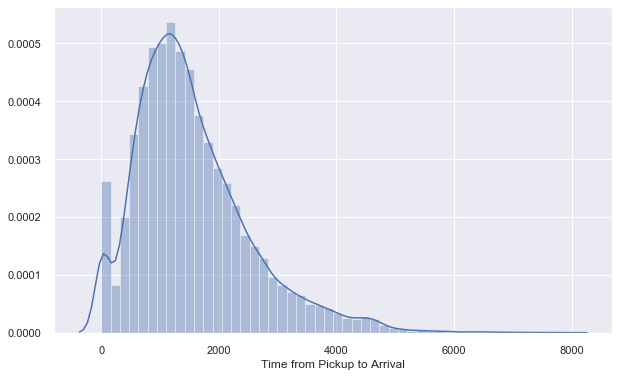

In [115]:
 sns.distplot(data[data['Time from Pickup to Arrival'] >=1]['Time from Pickup to Arrival'])

In [132]:
malo_sec = list(data[data['Time from Pickup to Arrival'] == 10]['Rider Id'].unique())

In [135]:
data[data['Time from Pickup to Arrival'] <= 2].groupby('Rider Id')['Rider Id'].count().sort_values()

Rider Id
Rider_Id_485     1
Rider_Id_472     1
Rider_Id_855     1
Rider_Id_501     1
Rider_Id_871     1
Rider_Id_926     1
Rider_Id_531     1
Rider_Id_539     1
Rider_Id_547     1
Rider_Id_555     1
Rider_Id_564     1
Rider_Id_576     1
Rider_Id_62      1
Rider_Id_623     1
Rider_Id_86      1
Rider_Id_68      1
Rider_Id_709     1
Rider_Id_728     1
Rider_Id_740     1
Rider_Id_76      1
Rider_Id_779     1
Rider_Id_79      1
Rider_Id_800     1
Rider_Id_807     1
Rider_Id_828     1
Rider_Id_849     1
Rider_Id_436     1
Rider_Id_424     1
Rider_Id_856     1
Rider_Id_406     1
Rider_Id_250     1
Rider_Id_214     1
Rider_Id_293     1
Rider_Id_206     1
Rider_Id_191     1
Rider_Id_19      1
Rider_Id_253     1
Rider_Id_36      1
Rider_Id_380     1
Rider_Id_167     1
Rider_Id_403     1
Rider_Id_405     1
Rider_Id_11      1
Rider_Id_377     1
Rider_Id_27      1
Rider_Id_188     2
Rider_Id_813     2
Rider_Id_119     2
Rider_Id_652     2
Rider_Id_523     2
Rider_Id_61      2
Rider_Id_295     2
Rid

In [131]:
riders.set_index('Rider Id').loc[['Rider_Id_239','Rider_Id_39','Rider_Id_515','Rider_Id_10','Rider_Id_619','Rider_Id_647','Rider_Id_953']]

,No_Of_Orders,Age,Average_Rating,No_of_Ratings,avg_rate_given_Nrate
Rider Id,,,,,
Rider_Id_239,6856,2038,13.3,402,0.033085
Rider_Id_39,7204,1909,13.3,354,0.037571
Rider_Id_515,7142,2132,13.2,388,0.034021
Rider_Id_10,6978,1990,13.3,413,0.032203
Rider_Id_619,7056,2047,13.3,411,0.032360
Rider_Id_647,1730,1075,13.8,236,0.058475
Rider_Id_953,1270,367,14.4,131,0.109924


In [140]:
test_zindi.set_index('Rider Id').loc[['Rider_Id_239','Rider_Id_39','Rider_Id_515']]

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
Rider Id,,,,,,,,,,,,,,,,,,,,,,,,
Rider_Id_239,Order_No_6258,User_Id_517,Bike,3,Business,29,4,10:19:48 AM,29,4,10:20:08 AM,29,4,10:20:15 AM,29,4,10:45:15 AM,5,21.5,NaN,-1.317755,36.830370,-1.307787,36.844321
Rider_Id_239,Order_No_8187,User_Id_393,Bike,3,Business,26,1,8:33:08 AM,26,1,9:52:53 AM,26,1,9:52:57 AM,26,1,10:21:00 AM,14,17.9,4.9,-1.317755,36.830370,-1.306378,36.751984
Rider_Id_239,Order_No_24254,User_Id_517,Bike,3,Business,30,4,9:40:25 AM,30,4,9:40:34 AM,30,4,9:40:46 AM,30,4,10:26:12 AM,11,19.2,NaN,-1.322800,36.830644,-1.263818,36.793006
Rider_Id_239,Order_No_23923,User_Id_1500,Bike,3,Business,27,3,3:15:44 PM,27,3,3:16:47 PM,27,3,3:16:50 PM,27,3,4:05:35 PM,11,29.0,NaN,-1.307787,36.844321,-1.263818,36.793006
Rider_Id_239,Order_No_18348,User_Id_517,Bike,3,Business,28,4,4:06:14 PM,28,4,4:06:24 PM,28,4,4:06:28 PM,28,4,4:32:38 PM,11,25.6,NaN,-1.316711,36.830156,-1.263818,36.793006
Rider_Id_239,Order_No_6143,User_Id_393,Bike,3,Business,25,4,11:22:42 AM,25,4,11:22:53 AM,25,4,11:23:07 AM,25,4,12:28:12 PM,14,NaN,NaN,-1.316711,36.830156,-1.299144,36.752880
Rider_Id_239,Order_No_11761,User_Id_2521,Bike,3,Business,9,6,10:20:48 AM,9,6,10:20:56 AM,9,6,10:21:01 AM,9,6,10:45:21 AM,15,27.3,NaN,-1.306378,36.751984,-1.316711,36.830156
Rider_Id_239,Order_No_25890,User_Id_393,Bike,3,Business,18,5,11:09:02 AM,18,5,11:09:50 AM,18,5,11:09:55 AM,18,5,12:08:30 PM,11,20.0,NaN,-1.316711,36.830156,-1.257422,36.792707
Rider_Id_239,Order_No_12525,User_Id_393,Bike,3,Business,14,2,9:36:32 AM,14,2,9:36:47 AM,14,2,9:36:55 AM,14,2,10:45:01 AM,14,NaN,NaN,-1.316711,36.830156,-1.299144,36.752880


In [141]:
data.set_index('Rider Id').loc[['Rider_Id_239','Rider_Id_39','Rider_Id_515']]

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
Rider Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rider_Id_239,Order_No_2393,User_Id_393,Bike,3,Business,8,4,10:58:27 AM,8,4,10:58:43 AM,8,4,10:58:48 AM,8,4,11:22:52 AM,8,4,12:11:30 PM,14,26.2,NaN,-1.317755,36.830370,-1.306378,36.751984,2918
Rider_Id_239,Order_No_982,User_Id_1500,Bike,3,Business,10,3,9:41:14 AM,10,3,9:41:43 AM,10,3,9:41:51 AM,10,3,10:40:13 AM,10,3,10:40:15 AM,13,27.7,NaN,-1.263818,36.793006,-1.322800,36.830644,2
Rider_Id_239,Order_No_5276,User_Id_867,Bike,3,Business,1,5,2:37:22 PM,1,5,2:37:49 PM,1,5,2:40:12 PM,1,5,2:47:28 PM,1,5,3:16:45 PM,14,31.8,NaN,-1.322800,36.830644,-1.299144,36.752880,1757
Rider_Id_239,Order_No_14322,User_Id_393,Bike,3,Business,4,2,4:27:15 PM,4,2,4:27:15 PM,4,2,4:28:52 PM,4,2,4:48:22 PM,4,2,4:48:24 PM,4,22.3,NaN,-1.322800,36.830644,-1.300406,36.829741,2
Rider_Id_239,Order_No_19054,User_Id_393,Bike,3,Business,20,3,8:52:40 AM,20,3,8:52:50 AM,20,3,8:52:55 AM,20,3,9:44:23 AM,20,3,9:44:25 AM,14,20.9,NaN,-1.316711,36.830156,-1.299144,36.752880,2
Rider_Id_239,Order_No_14702,User_Id_1500,Bike,3,Business,22,5,12:15:17 PM,22,5,12:18:18 PM,22,5,12:18:30 PM,22,5,1:20:49 PM,22,5,1:21:35 PM,8,28.3,NaN,-1.300406,36.829741,-1.263818,36.793006,46
Rider_Id_239,Order_No_10560,User_Id_238,Bike,3,Business,15,5,2:03:38 PM,15,5,2:06:58 PM,15,5,2:08:38 PM,15,5,2:39:00 PM,15,5,2:42:32 PM,4,28.1,NaN,-1.300406,36.829741,-1.307787,36.844321,212
Rider_Id_239,Order_No_5913,User_Id_238,Bike,3,Business,5,2,12:47:41 PM,5,2,12:47:49 PM,5,2,12:47:53 PM,5,2,1:06:39 PM,5,2,1:06:41 PM,15,25.5,NaN,-1.307787,36.844321,-1.362953,36.904214,2
Rider_Id_239,Order_No_26374,User_Id_393,Bike,3,Business,29,1,10:52:47 AM,29,1,10:58:10 AM,29,1,10:58:13 AM,29,1,12:07:34 PM,29,1,12:07:35 PM,14,NaN,NaN,-1.316711,36.830156,-1.299144,36.752880,1


# среднее снедреквадратичн отклонение

In [73]:
data['speed'] = data['Distance (KM)'] / (data['Time from Pickup to Arrival'] / 3600) 

In [74]:
# from scipy.stats import norm
# sns.distplot(data[data.speed <=55].speed, fit = norm)

In [96]:
data_noano = data[data.speed <=60].copy()
data_noano = data_noano.rename(columns = {'speed':'noano_speed'})

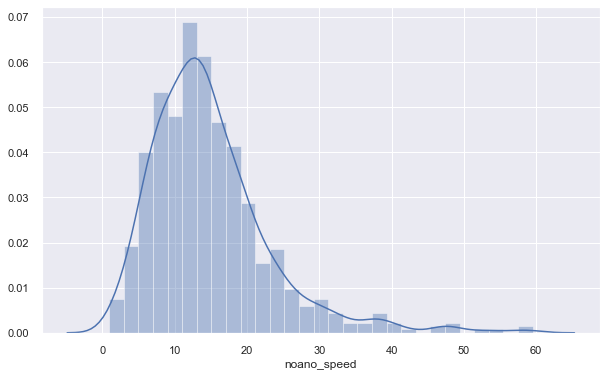

In [98]:
sns.distplot(data_noano[data_noano['Distance (KM)']==2].noano_speed)

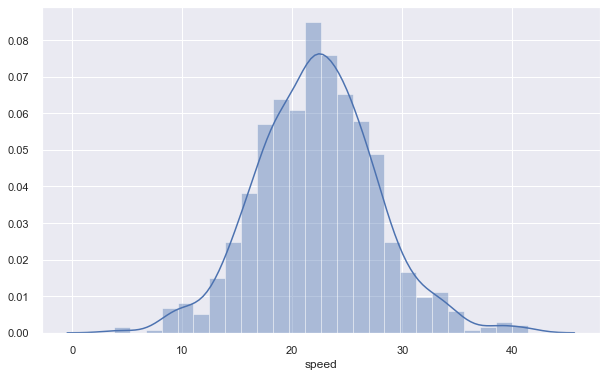

In [72]:
sns.distplot(data_noano.groupby('Rider Id').mean().speed)

In [145]:
max_noano_speed_to_merge = pd.DataFrame(data_noano.groupby('Rider Id').max().noano_speed).rename(columns = {'noano_speed':'max_noano_speed'})
min_noano_speed_to_merge = pd.DataFrame(data_noano.groupby('Rider Id').min().noano_speed).rename(columns = {'noano_speed':'min_noano_speed'})
mean_noano_speed_to_merge = pd.DataFrame(data_noano.groupby('Rider Id').mean().noano_speed).rename(columns = {'noano_speed':'mean_noano_speed'})
std_noano_speed_to_merge = pd.DataFrame(data_noano.groupby('Rider Id').std().noano_speed).rename(columns = {'noano_speed':'std_noano_speed'})
max_speed_to_merge = pd.DataFrame(data.groupby('Rider Id').max().speed).rename(columns = {'speed':'max_speed'})
min_speed_to_merge = pd.DataFrame(data.groupby('Rider Id').min().speed).rename(columns = {'speed':'min_speed'})
mean_speed_to_merge = pd.DataFrame(data.groupby('Rider Id').mean().speed).rename(columns = {'speed':'mean_speed'})
std_speed_to_merge = pd.DataFrame(data.groupby('Rider Id').std().speed).rename(columns = {'speed':'std_speed'})

In [165]:
speed_stat = pd.concat([max_speed_to_merge, min_speed_to_merge,mean_speed_to_merge,std_speed_to_merge], axis=1,sort=True)
noano_speed_stat = pd.concat([max_noano_speed_to_merge, min_noano_speed_to_merge,mean_noano_speed_to_merge,std_noano_speed_to_merge], axis=1,sort=True)
full_stat = pd.concat([speed_stat,noano_speed_stat],axis = 1,sort=True)

In [169]:
# были ли аномальные значения
result = pd.concat([riders, full_stat], axis=1,sort=True)
result['is_anomaly'] = np.where(result.max_speed >=60,1,0)

In [189]:
result['mean_order_day'] = result.No_Of_Orders / result.Age
result['mean_c_ratings'] = result.No_Of_Orders / result.No_of_Ratings
result['Age_rating'] = result.Age / result.No_of_Ratings


In [190]:
result

,No_Of_Orders,Age,Average_Rating,No_of_Ratings,max_speed,min_speed,mean_speed,std_speed,max_noano_speed,min_noano_speed,mean_noano_speed,std_noano_speed,is_anomaly,mean_order_day,mean_c_ratings,Age_rating
Rider_Id_0,3048,2570,14.0,512,31.012204,31.012204,31.012204,NaN,31.012204,31.012204,31.012204,NaN,0,1.185992,5.953125,5.019531
Rider_Id_1,8,589,0.0,1,29.707427,29.707427,29.707427,NaN,29.707427,29.707427,29.707427,NaN,0,0.013582,8.000000,589.000000
Rider_Id_10,6978,1990,13.3,413,36000.000000,15.197889,5927.247261,7689.150919,38.135593,15.197889,28.033570,5.737331,1,3.506533,16.895884,4.818402
Rider_Id_100,362,910,13.4,109,56.509695,3.922637,24.586292,9.654220,56.509695,3.922637,24.586292,9.654220,0,0.397802,3.321101,8.348624
Rider_Id_101,1299,986,13.1,287,240.000000,4.845222,25.133049,18.525649,54.609102,4.845222,23.952462,9.414009,1,1.317444,4.526132,3.435540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rider_Id_959,275,379,13.7,26,37.388724,9.090909,22.501619,7.856677,37.388724,9.090909,22.501619,7.856677,0,0.725594,10.576923,14.576923
Rider_Id_96,713,726,14.8,66,144.339623,6.726457,25.337601,15.199759,51.857468,6.726457,24.182242,9.649440,1,0.982094,10.803030,11.000000
Rider_Id_97,5694,2419,13.5,298,7800.000000,19.407008,1463.803315,2918.177951,46.753247,19.407008,31.142822,11.208310,1,2.353865,19.107383,8.117450
Rider_Id_98,3526,2350,14.0,162,1350.000000,18.488628,684.244314,941.520720,18.488628,18.488628,18.488628,NaN,1,1.500426,21.765432,14.506173


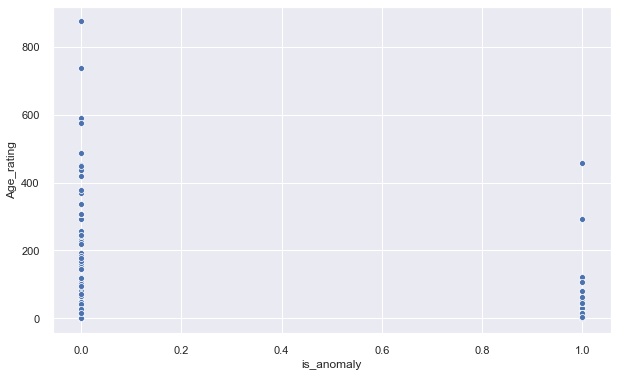

In [191]:
sns.scatterplot(x= result.is_anomaly, y = result.Age_rating)

# Временные фичи

In [210]:
data

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,average_speed,speed,t_from_pl_to_conf,t_from_conf_to_arrival,t_from_arrival_to_pickup
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,19.328859,19.328859,264.0,1477.0,1363.0
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,28.901154,28.901154,425.0,1021.0,227.0
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,23.736264,23.736264,199.0,410.0,209.0
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,24.161074,24.161074,31.0,711.0,310.0
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,26.688633,26.688633,60.0,455.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,3:55:09 PM,20,3,3:58:49 PM,20,3,4:20:08 PM,20,3,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,1200.000000,1200.000000,31.0,220.0,1279.0
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,10:13:41 AM,13,6,10:20:04 AM,13,6,10:33:27 AM,13,6,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,32.727273,32.727273,7.0,383.0,803.0
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,5:07:09 PM,7,4,5:30:17 PM,7,4,5:50:52 PM,7,4,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,24.381984,24.381984,53.0,1388.0,1235.0
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,9:31:53 AM,4,3,9:38:59 AM,4,3,9:45:15 AM,4,3,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380,33.913043,33.913043,14.0,426.0,376.0


## расстояния во времени между определенными промежутками времени

In [ ]:
def add_time_feature(data):
        # через сколько гонщик подтвердил, что он приедет за заказом
    data['t_from_pl_to_conf'] = (pd.to_datetime(data["Confirmation - Time"]) - pd.to_datetime(data["Placement - Time"])).astype('timedelta64[s]')
    # через сколько времени после подтверждения гонщик приехал, чтобы забрать заказ
    data['t_from_conf_to_arrival'] = (pd.to_datetime(data["Arrival at Pickup - Time"]) - pd.to_datetime(data["Confirmation - Time"])).astype('timedelta64[s]')
    # промежуток времени между  тем когда гонщик приехал забрать и заказ, и чеез сколько он его реально забрал
    data['t_from_arrival_to_pickup'] = (pd.to_datetime(data["Pickup - Time"]) - pd.to_datetime(data["Arrival at Pickup - Time"])).astype('timedelta64[s]')
    data["Pickup - hour"] = pd.to_datetime(data["Pickup - Time"]).dt.hour.astype("category")

In [203]:
# через сколько гонщик подтвердил, что он приедет за заказом
data['t_from_pl_to_conf'] = (pd.to_datetime(data["Confirmation - Time"]) - pd.to_datetime(data["Placement - Time"])).astype('timedelta64[s]')
# через сколько времени после подтверждения гонщик приехал, чтобы забрать заказ
data['t_from_conf_to_arrival'] = (pd.to_datetime(data["Arrival at Pickup - Time"]) - pd.to_datetime(data["Confirmation - Time"])).astype('timedelta64[s]')
# промежуток времени между  тем когда гонщик приехал забрать и заказ, и чеез сколько он его реально забрал
data['t_from_arrival_to_pickup'] = (pd.to_datetime(data["Pickup - Time"]) - pd.to_datetime(data["Arrival at Pickup - Time"])).astype('timedelta64[s]')

## дропнем использованные столбцы

In [219]:
# columns_to_drop_both = ['Vehicle Type','User Id','Precipitation in millimeters','Pickup Lat','Pickup Long',
#                         'Destination Lat','Destination Long','Pickup - Day of Month',
#                        'Placement - Day of Month',
#                        'Placement - Weekday (Mo = 1)',
#                        'Placement - Time', 'Confirmation - Day of Month',
#                        'Confirmation - Weekday (Mo = 1)',
#                        'Confirmation - Time',
#                         "Pickup - Time",
#                        'Arrival at Pickup - Day of Month',
#                        'Arrival at Pickup - Weekday (Mo = 1)',
#                        'Arrival at Pickup - Time']
# columns_to_drop_train = ['Arrival at Destination - Day of Month',
#         'Arrival at Destination - Weekday (Mo = 1)',
#        'Arrival at Destination - Time']
# data.drop(columns=columns_to_drop_both + columns_to_drop_train,inplace=True)
# test_zindi.drop(columns=columns_to_drop_both,inplace=True)

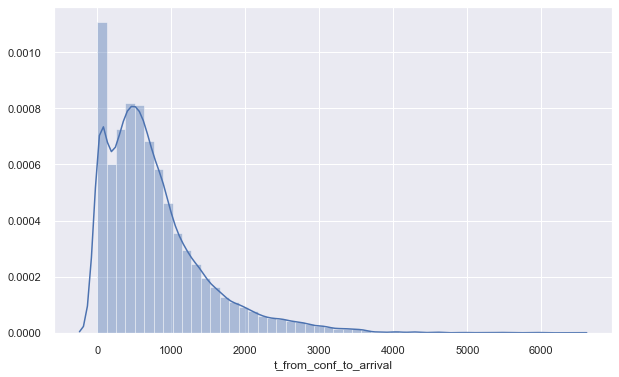

In [217]:
sns.distplot(data.t_from_conf_to_arrival)

# hh

In [1]:
data

NameError: name 'data' is not defined